# Actividad


---
Por: Ángela Daniela Córdoba Álvarez


---




In [1]:
# Instalar NLTK
!pip install nltk

In [2]:
# Descarga recursos adicionales
import nltk
nltk.download

<bound method Downloader.download of <nltk.downloader.Downloader object at 0x7a69cac39d50>>

In [3]:
from google.colab import files
import pandas as pd
import io

# Se hará uso de un dataset sobre métricas integrales de sueño y salud
df = pd.read_csv('Emotion.csv')

Emotion
anger    2000
joy      2000
fear     1937
Name: count, dtype: int64


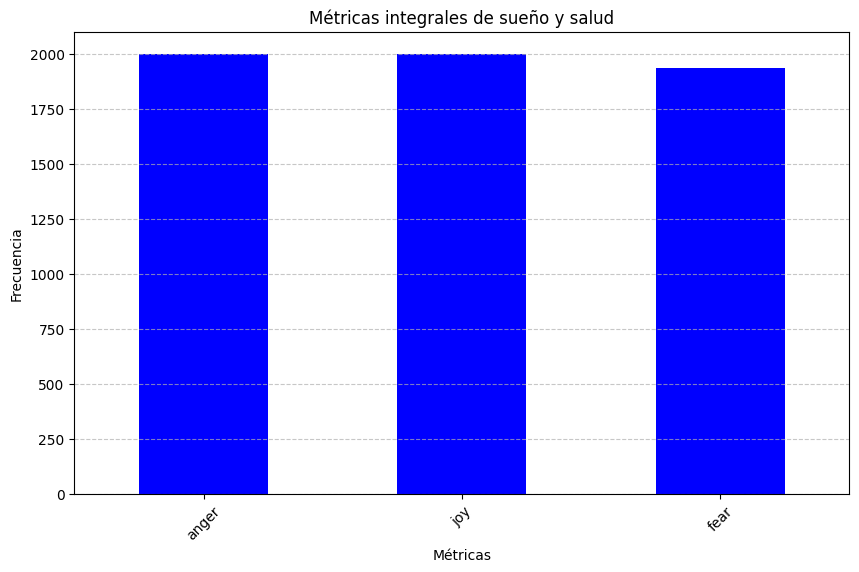

In [4]:
import matplotlib.pyplot as plt

print(df.iloc[:, 1].value_counts())
plt.figure(figsize=(10,6))

counts = df.iloc[:, 1].value_counts()
counts.plot(kind='bar', color='blue')
plt.title('Métricas integrales de sueño y salud')
plt.xlabel('Métricas')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [5]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string # Import the string module
nltk.download('stopwords')
nltk.download('punkt')

def preprocess_text(text):
    # Handle potential float values
    if isinstance(text, float):
        text = str(text)  # Convert float to string if needed

    # Convertir a minúsculas
    text = text.lower()

    # Eliminar signos de puntuación
    text = text.translate(str.maketrans('', '', string.punctuation)) # Use string.punctuation

    # Tokenización
    tokens = word_tokenize(text)

    # Eliminar stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and word.isalnum()]

    # Diccionario
    return {word: True for word in tokens}

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
df.columns

Index(['Comment', 'Emotion'], dtype='object')

In [7]:
featuresets = [(preprocess_text(text), label) for (text, label) in zip(df['Comment'], df['Emotion'])]
#
print(featuresets)

[({'seriously': True, 'hate': True, 'one': True, 'subject': True, 'death': True, 'feel': True, 'reluctant': True, 'drop': True}, 'fear'), ({'im': True, 'full': True, 'life': True, 'feel': True, 'appalled': True}, 'anger'), ({'sit': True, 'write': True, 'start': True, 'dig': True, 'feelings': True, 'think': True, 'afraid': True, 'accept': True, 'possibility': True, 'might': True, 'make': True}, 'fear'), ({'ive': True, 'really': True, 'angry': True, 'r': True, 'feel': True, 'like': True, 'idiot': True, 'trusting': True, 'first': True, 'place': True}, 'joy'), ({'feel': True, 'suspicious': True, 'one': True, 'outside': True, 'like': True, 'rapture': True, 'happened': True, 'something': True}, 'fear'), ({'feel': True, 'jealous': True, 'becasue': True, 'wanted': True, 'kind': True, 'love': True, 'true': True, 'connection': True, 'two': True, 'souls': True}, 'anger'), ({'friend': True, 'mine': True, 'keeps': True, 'telling': True, 'morbid': True, 'things': True, 'happened': True, 'dog': True}

[('feel', 3837), ('feeling', 1912), ('like', 909), ('im', 830), ('little', 312), ('know', 304), ('really', 302), ('time', 282), ('get', 277), ('people', 251)]


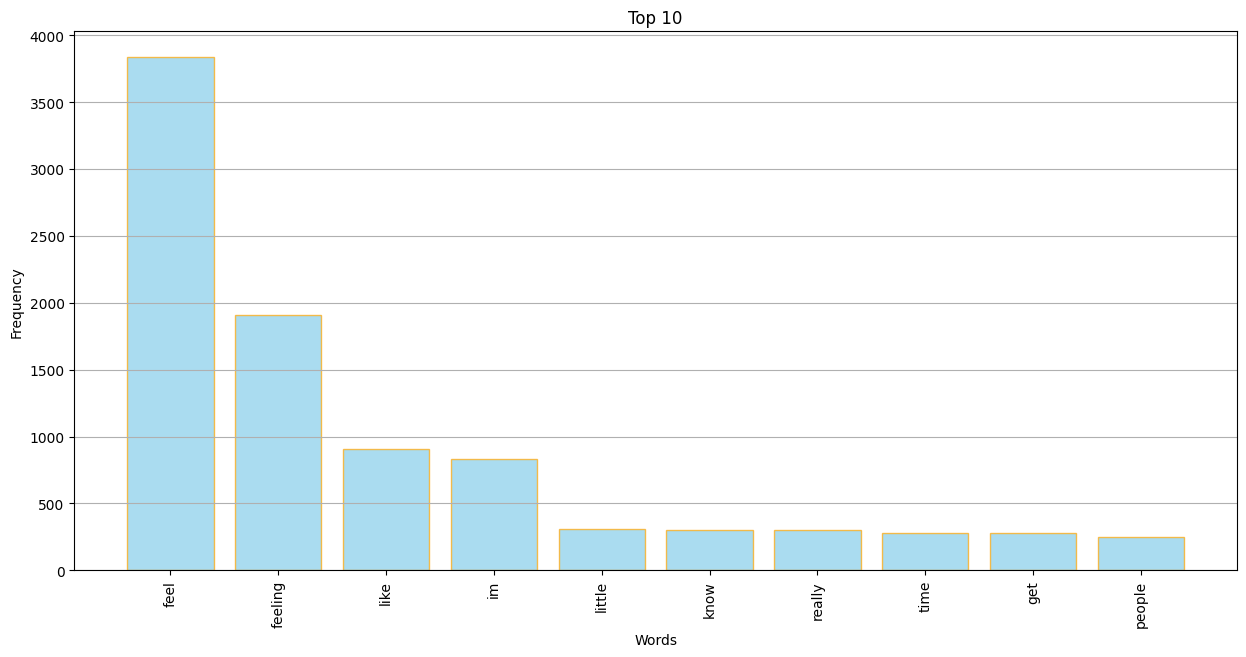

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

all = [] # Lista para extraer
for features, label in featuresets:
  all.extend(features.keys())

# Frecuencia
contador = Counter(all)

# Ordenar por frecuencia
contador_ordenado = sorted(contador.items(), key=lambda x: x[1], reverse=True)

# Top
top_10 = contador_ordenado[:10]
words, counts = zip(*top_10)
print(top_10)

# Histograma
plt.figure(figsize=(15, 7))
plt.bar(words, counts, color='skyblue', edgecolor='orange', alpha=0.7)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10')
plt.xticks(rotation=90)
plt.grid(axis='y')

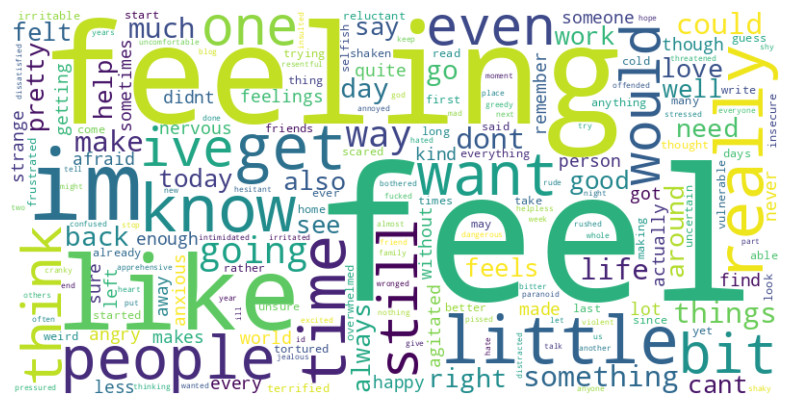

In [9]:
freq = dict(contador)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [10]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en entrenamiento y prueba
train_set, test_set = train_test_split(featuresets, test_size=0.2, random_state=42)

# Separar características y etiquetas
train_features = [features for features, label in train_set]
train_labels = [label for features, label in train_set]
test_features = [features for features, label in test_set]
test_labels = [label for features, label in test_set]

# Convertir características a matrices
vectorizer = DictVectorizer(sparse=False)
X_train = vectorizer.fit_transform(train_features)
X_test = vectorizer.transform(test_features)
y_train = train_labels
y_test = test_labels

In [11]:
# Entrenar clasificador
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

labelll = LabelEncoder()
y_train = labelll.fit_transform(y_train)
y_test = labelll.transform(y_test)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Realizar predicciones
y_pred = clf.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)

Accuracy: 0.9537037037037037


Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1-Score: 0.95
Confusion Matrix:
[[379   7   6]
 [ 21 386   9]
 [  5   7 368]]


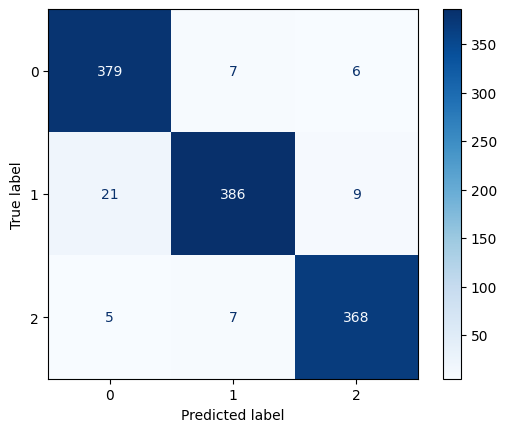

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

# Métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

matrix = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
matrix.plot(cmap=plt.cm.Blues)
plt.show()

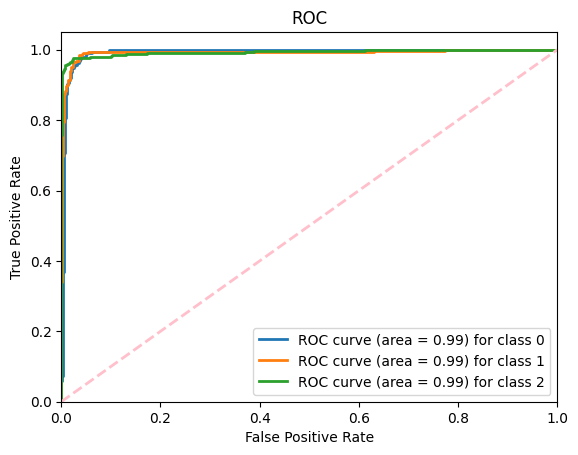

In [13]:
# Importa las funciones necesarias para calcular y graficar la curva ROC y el área bajo la curva (AUC).
from sklearn.metrics import roc_auc_score, roc_curve, auc
# Importa la función para convertir etiquetas multiclase a binarias.
from sklearn.preprocessing import LabelBinarizer

# Crea un objeto LabelBinarizer para convertir las etiquetas de prueba a formato binario.
lb = LabelBinarizer()
# Transforma las etiquetas de prueba a formato binario.
y_test_binarized = lb.fit_transform(y_test)

plt.figure()

# Itera sobre cada clase en las etiquetas binarizadas.
for i in range(y_test_binarized.shape[1]):
    # Obtiene las probabilidades de predicción para la clase actual.
    y_score = clf.predict_proba(X_test)[:, i]
    # Calcula la tasa de falsos positivos (fpr), la tasa de verdaderos positivos (tpr) y los umbrales.
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score)
    # Calcula el área bajo la curva ROC (AUC).
    roc_auc = auc(fpr, tpr)
    # Grafica la curva ROC para la clase actual.
    plt.plot(fpr, tpr, lw=2, label='ROC curve (area = %0.2f) for class %d' % (roc_auc, i))

# Grafica la línea diagonal (clasificador aleatorio).
plt.plot([0, 1], [0, 1], color='pink', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')

plt.show()

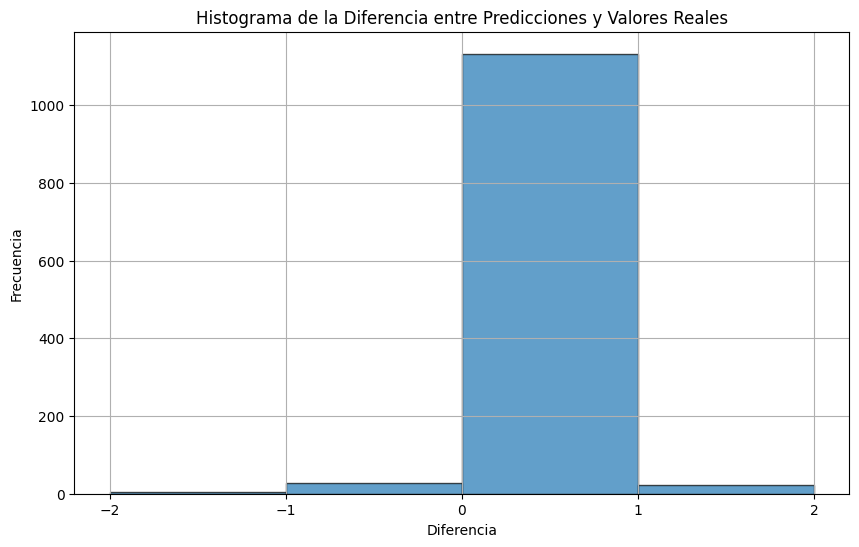

In [14]:
dif = y_pred - y_test

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(dif, bins=range(-2, 3), edgecolor='k', alpha=0.7)
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.title('Histograma de la Diferencia entre Predicciones y Valores Reales')
plt.xticks(range(-2, 3))
plt.grid(True)
plt.show()